In [1]:
import pandas as pd


df = pd.read_csv("data/labeling_in_progress_2023_12_28_13_20.csv")

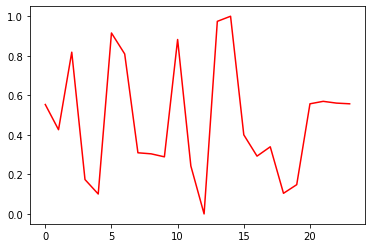

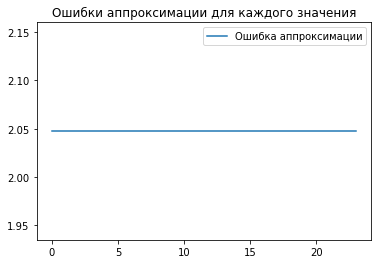

Границы сегментов: []
true segments: [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0]


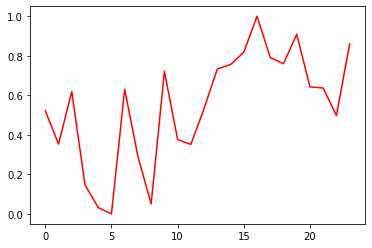

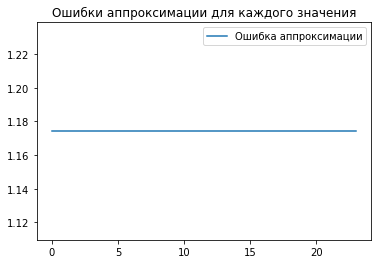

Границы сегментов: []
true segments: [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]


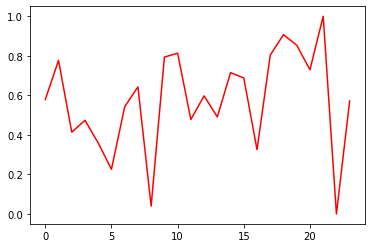

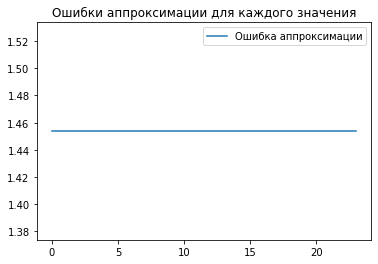

Границы сегментов: []
true segments: [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0]


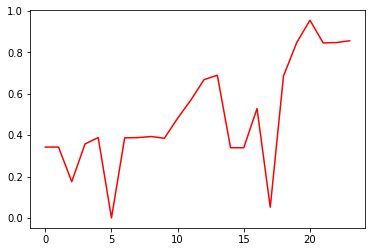

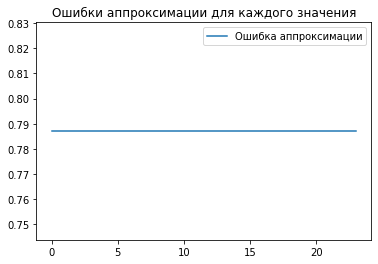

Границы сегментов: []
true segments: [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0]


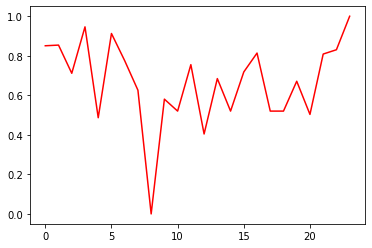

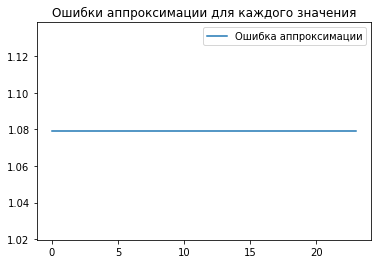

Границы сегментов: []
true segments: [0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]


In [6]:
import numpy as np
import matplotlib.pyplot as plt
from segmentation_tools import SWAB, bottom_up, sliding_window

# Предполагаем, что df - это ваш DataFrame с данными
# и что он уже загружен в вашем коде

for i in range(5):
    norm_prices = np.array([df.at[i, f'norm_price_{j + 1}'] for j in range(25)]).reshape(-1, 1)
    buy_sell_labels = [df.at[i, f'sep_point_{j + 1}'] for j in range(25)]

    max_error = 1  # Максимально допустимая ошибка сегментации
    buffer_size = 3   # Размер буфера
    segmenter = sliding_window()

    # Настройка параметров сегментации
    plr = "linear_regression"  # Метод аппроксимации: линейная регрессия
    error_type = "max"  # Тип ошибки: максимальная ошибка

    # Применение алгоритма сегментации к временному ряду
    segmenter.fit(norm_prices, max_error, plr, error_type)

    # Визуализация результата
    segmenter.segment_plot()

    # Расчет и визуализация ошибок
    errors = []
    for segment in segmenter.segments:
        # Вычисление ошибки для каждого сегмента
        segment_error = segmenter.calculate_error(segment.data)
        errors.extend([segment_error] * len(segment.data))

    plt.figure()
    plt.plot(errors, label='Ошибка аппроксимации')
    plt.legend()
    plt.title('Ошибки аппроксимации для каждого значения')
    plt.show()

    # Вывод границ сегментов
    print("Границы сегментов:", segmenter.segment_borders)
    print(f"true segments: {buy_sell_labels}")
